In [53]:
import matplotlib.pyplot as plt
import pandas as pd

with open("employee (1).csv", 'r', encoding = "cp1251") as f:
    lines = f.readlines()
validLines = []
print(lines[2])
for line in lines[1:]:
    line = line.strip()
    indexesSplit = [i for i in range(len(line)) if line[i] == ';']

    if len(indexesSplit) >= 2:
        line = [el.strip() for el in line.split(';')]
        if len(line) > 6:
            while line[5][0].isalpha():
                line.pop(5)
            numbers = '; '.join(line[5:])
            del line[5:]
            line.append(numbers)
        validLines.append(line)

df = pd.DataFrame(validLines, columns = ["code", "first_name" , "birthday", "entry_date", "dismissal_date", "phone_email"])
df.head()
print(len(df))


      668;Валерия                       ;11/08/1978;22/04/2003;16/10/2017;8-913-511-05-17             

33055


In [54]:
df.head()

,code,first_name,birthday,entry_date,dismissal_date,phone_email
0,667,Елена,04/07/1981,18/12/2000,,+79232436876
1,668,Валерия,11/08/1978,22/04/2003,16/10/2017,8-913-511-05-17
2,669,3,,01/07/1999,30/05/2005,
3,670,Андрей,01/12/1985,15/03/2007,01/12/2009,89133919793
4,671,Доставка,,01/07/1999,,


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
df[["birthday", "entry_date", "dismissal_date"]] = df[["birthday", "entry_date", "dismissal_date"]].apply(pd.to_datetime, errors = "coerce",  dayfirst=True)
df = df[(df["birthday"] < df['entry_date']) & (df["entry_date"] <= df["dismissal_date"])]
dfFiltered = df[df["dismissal_date"].notna()]

dfWithCountWorks = dfFiltered.groupby(["first_name", "birthday"]).agg(
    count_works=("dismissal_date", "nunique"),
    first_entry_date=("entry_date", "min")
).reset_index()

print(dfWithCountWorks["count_works"].min())

1


In [56]:
dfWithCountWorks.head()

,first_name,birthday,count_works,first_entry_date
0,,1987-07-03,1,2005-09-01
1,Aлександр,1986-11-06,1,2010-08-12
2,Mария,1982-04-20,1,2006-06-04
3,Ёкут,1972-10-03,1,2011-04-22
4,А.,1952-11-02,1,2021-02-01


In [57]:
dfWithCountWorks.sort_values(["count_works", "first_name"])

,first_name,birthday,count_works,first_entry_date
0,,1987-07-03,1,2005-09-01
1,Aлександр,1986-11-06,1,2010-08-12
2,Mария,1982-04-20,1,2006-06-04
3,Ёкут,1972-10-03,1,2011-04-22
4,А.,1952-11-02,1,2021-02-01
...,...,...,...,...
19272,Полина,1978-06-01,5,2006-01-10
20283,Светлана,1961-05-08,5,2011-09-10
21197,Софья,1994-07-14,5,2013-05-07
14596,Лариса,1961-08-17,6,2016-07-13


In [ ]:
combinations = df[["first_name", "birthday"]].drop_duplicates()
listForEmployees = {}
for index, comb in combinations.iterrows():
    key = (comb["first_name"], comb["birthday"])
    listForEmployees[key] = (df[(df["first_name"] == comb["first_name"]) & (df["birthday"] == comb["birthday"])])


In [58]:
print(listForEmployees[key].head())

        code first_name   birthday entry_date dismissal_date       phone_email
33006  35055     Айжана 2005-01-29 2024-03-07     2024-03-11  +7 909 905 91 85


In [59]:
countWorks = dfWithCountWorks["count_works"].drop_duplicates()
dictionary = {}

for count in countWorks:
    dictionary[count] = dfWithCountWorks[dfWithCountWorks["count_works"] == count]["first_entry_date"].dt.year - \
    dfWithCountWorks[dfWithCountWorks["count_works"] == count]["birthday"].dt.year



In [60]:
for count, ages in dictionary.items():
    print(f"Количество приёмов-увольнений: {count}")
    print(f"Возраста при первом трудоустройстве: {ages.tolist()}")

Количество приёмов-увольнений: 1
Возраста при первом трудоустройстве: [18, 24, 24, 39, 69, 28, 22, 20, 28, 15, 39, 32, 35, 42, 28, 46, 27, 25, 19, 22, 25, 19, 16, 30, 19, 26, 18, 26, 21, 37, 55, 24, 22, 26, 35, 19, 21, 33, 38, 32, 30, 18, 29, 116, 29, 21, 27, 18, 24, 47, 19, 26, 20, 17, 36, 20, 19, 55, 25, 20, 16, 19, 20, 19, 26, 24, 23, 19, 19, 19, 47, 34, 21, 56, 31, 28, 28, 22, 18, 25, 23, 23, 24, 46, 21, 27, 25, 18, 31, 29, 23, 23, 40, 57, 55, 40, 34, 23, 118, 38, 40, 35, 31, 33, 32, 22, 23, 22, 18, 27, 24, 21, 23, 20, 27, 22, 23, 123, 28, 18, 20, 23, 26, 40, 26, 29, 30, 21, 22, 19, 20, 18, 42, 57, 33, 35, 44, 26, 21, 19, 26, 24, 22, 23, 20, 19, 32, 36, 41, 19, 27, 23, 17, 22, 22, 22, 38, 30, 39, 26, 30, 27, 19, 64, 55, 23, 31, 27, 19, 34, 28, 26, 38, 28, 39, 40, 23, 20, 28, 21, 31, 16, 123, 28, 30, 22, 26, 30, 17, 20, 18, 34, 31, 27, 25, 26, 27, 39, 35, 18, 19, 22, 35, 23, 35, 27, 24, 22, 48, 32, 32, 25, 23, 25, 24, 31, 33, 31, 27, 23, 43, 32, 60, 39, 44, 39, 46, 28, 19, 22, 43, 4

0
12
19
13
14
18


/tmp/ipykernel_174844/3494565471.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_plot, labels=labels, showfliers = True)


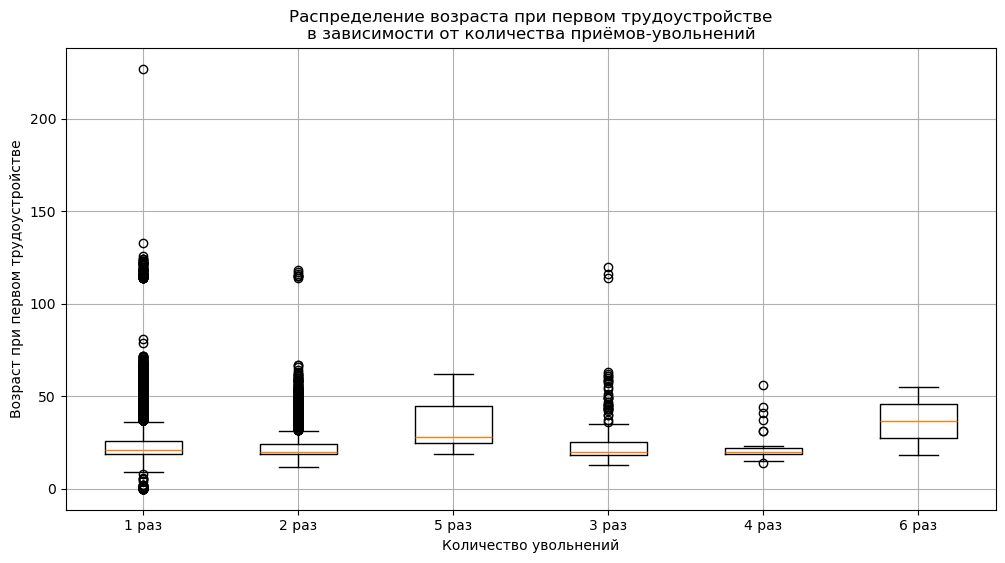

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных для Boxplot
data_for_plot = []
labels = []

for count, ages in dictionary.items():
    data_for_plot.append(ages.dropna())  # удаляем NaN
    labels.append(f"{count} раз")
    print(ages.min())

# Построение
plt.figure(figsize=(12, 6))
plt.boxplot(data_for_plot, labels=labels, showfliers = True)
plt.title("Распределение возраста при первом трудоустройстве\nв зависимости от количества приёмов-увольнений")
plt.xlabel("Количество увольнений")
plt.ylabel("Возраст при первом трудоустройстве")
plt.grid(True)
plt.show()

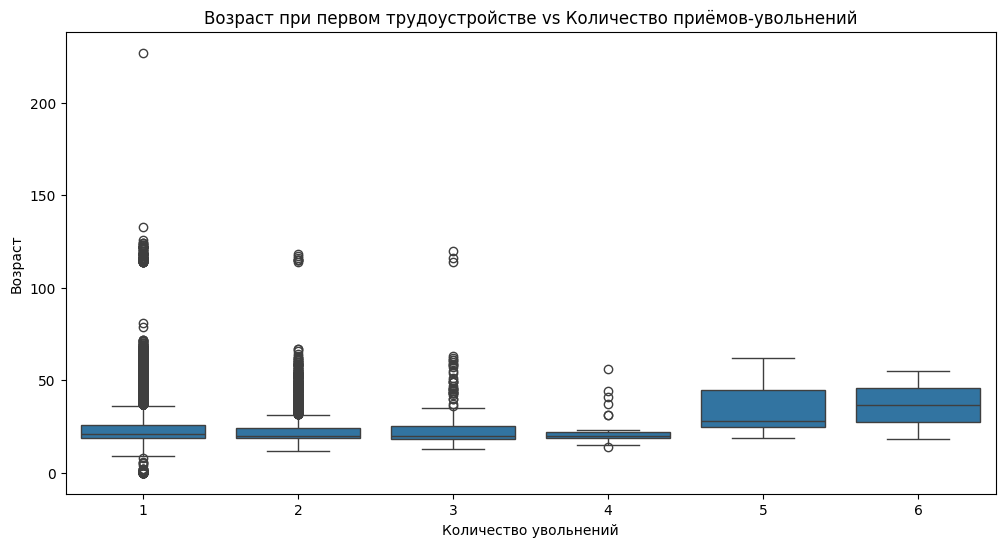

In [ ]:
# для seaborn
plot_data = []
for count, ages in dictionary.items():
    for age in ages.dropna():
        plot_data.append({"count_works": count, "age": age})

plot_df = pd.DataFrame(plot_data)

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_df, x="count_works", y="age")
plt.title("Возраст при первом трудоустройстве vs Количество приёмов-увольнений")
plt.xlabel("Количество увольнений")
plt.ylabel("Возраст")
plt.show()

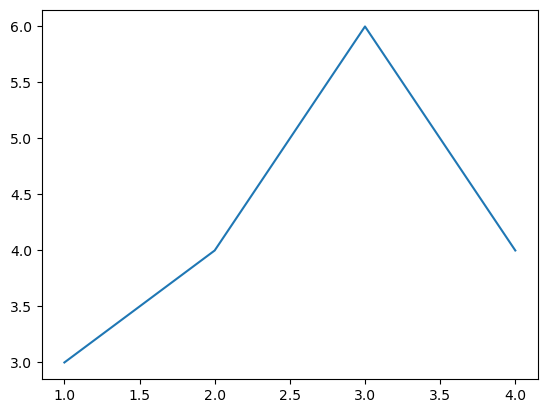

In [ ]:
x, y = [1, 2, 3, 4], [3, 4, 6, 4]
plt.plot(x, y)